AB Testing


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/AdSmartABdata.csv")

In [41]:
df.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [9]:
# checking the size of the data
df.shape

(8077, 9)

In [10]:
# checking for missing values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

1. Which online users belong to the control and exposed groups?

In [15]:
df.groupby("experiment")["auction_id"].count()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

2. How are the users targeted?


3. Could we use the counts of yes and no answers to make a judgement on which experiment is 
performing better? For example if #yes > #no for the exposed group than the control group, 
could we declare that the ad had a significant impact Why or why not?


In [20]:
agg = df.groupby("experiment").agg(
{"yes":"sum"})

In [22]:
agg

,yes
experiment,
control,264
exposed,308


In [24]:
agg = df.groupby("experiment").agg(
{"no":"sum"})

In [26]:
agg

,no
experiment,
control,322
exposed,349


4. What is the statistical process that generates the data? Which kind of statistical model will you 
use if you were to simulate the data?


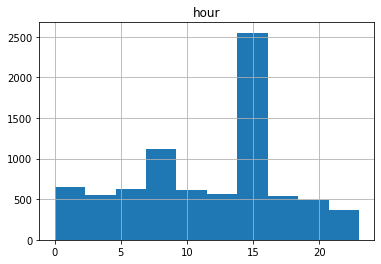

In [49]:
df.hist(["hour"]); # normal distribution

In [51]:
len(df.hour)

8077

In [52]:
import numpy as np

In [56]:
s = pd.DataFrame(np.random.normal(0, 1, 8077))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

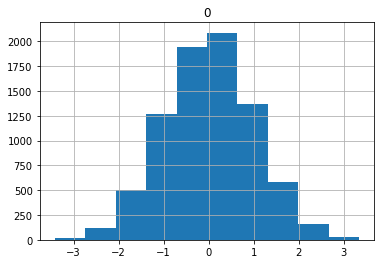

In [58]:
s.hist()

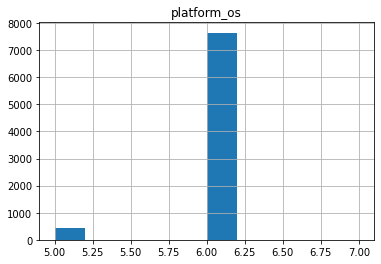

In [44]:
df.hist(["platform_os"]);

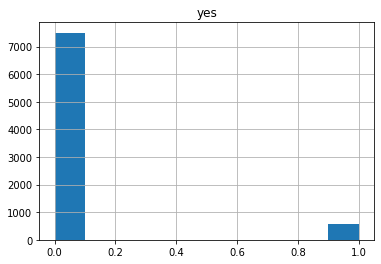

In [46]:
df.hist(["yes"]);

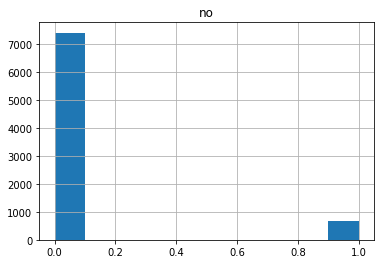

In [59]:
df.hist(["no"]);

5. Assessment of the statistical significance of an A/B test is dependent on what kind of probability 
distribution the experimental data follows. Given your answer above, which statistical 
tests (z-test, t-test, etc.) are appropriate to use for this project?


In [62]:
import statsmodels.api as sm

In [83]:
conditions = [df.yes == 1 , df.no == 1]
choices = [1, 0]
df['y'] = np.select(conditions, choices, default=2)

In [86]:
y = df.y
x = df[['hour','platform_os','yes','no']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
result =  model.summary()

In [87]:
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.345e+32
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        15:03:16   Log-Likelihood:             2.6770e+05
No. Observations:                8077   AIC:                        -5.354e+05
Df Residuals:                    8072   BIC:                        -5.354e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0000    2.9e-16    6.9e+15      0.000       2.000       2.000
hour        -1.095e-16    1.9e-18    -57.765      0.000   -1.13e-16   -1.06e-16
platform_os   1.84e-15   4.86e-17     37.874      0.000    1.74e-15    1.94e-15
yes            -1.0000   4.26e-17  -2.35e+16      0.000      -1.000      -1.000
no             -2.0000   3.96e-17  -5.05e+16      0.000      -2.000      -2.000
==============================================================================
Omnibus:                      398.131   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.259
Skew:                           0.497   Prob(JB):                    1.58e-111
Kurtosis:                       3.726   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In classical (frequentist) A/B testing, we use p-values to measure the significance of the experimental 
feature (being exposed to an ad in our case)  over the null hypothesis (the hypothesis that there is no 
difference in brand awareness between the exposed and control groups in the current case). 
How are p-values computed? What information do p-values provide? 
What are the  type-I and type-II errors you may have in the analysis? 
Can you comment on which error types p-values are related?
